In [1]:
import numpy as np
import pandas as pd
import nbimporter

import analyze_control as ac

import exp_study_case

Importing Jupyter notebook from exp_study_case.ipynb


In [2]:
hday, cday = exp_study_case.get_display_day()

In [3]:
# ダクト断熱あり, VAVなし
ins_non = ac.get_main_value(6)
# ダクト断熱なし, VAVなし
non_non = ac.get_main_value(52)
# ダクト断熱あり, VAVあり
ins_vav = ac.get_main_value(55)

## 居室の負荷

VAV有りとVAV無しにおいて、居室の負荷と未処理負荷、もともとの負荷を比較する。比較の際に、間仕切りの熱移動を含まない。

### 暖房（各室）

In [4]:
def get_data(rm):
    return [
        (ins_vav.l_h[rm], 'old'),
        (ins_vav.l_d_act_h[rm] - ins_vav.q_trs_prt_h[rm], 'treated VAV'),
        (ins_non.l_d_act_h[rm] - ins_non.q_trs_prt_h[rm], 'treated noVAV'),
        (ins_vav.q_ut_h[rm], 'untreated VAV'),
        (ins_non.q_ut_h[rm], 'untreated noVAV'),
        (ins_vav.l_d_act_h[rm] - ins_vav.q_trs_prt_h[rm] + ins_vav.q_ut_h[rm], 'all VAV'),
        (ins_non.l_d_act_h[rm] - ins_non.q_trs_prt_h[rm] + ins_non.q_ut_h[rm], 'all noVAV'),
]

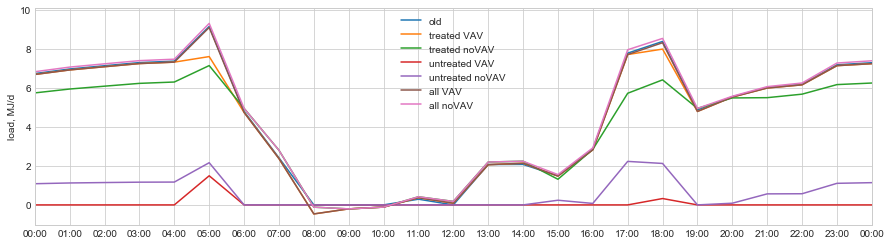

In [5]:
ac.draw_graph('load, MJ/d', get_data(0), op='raw', display_date=hday)

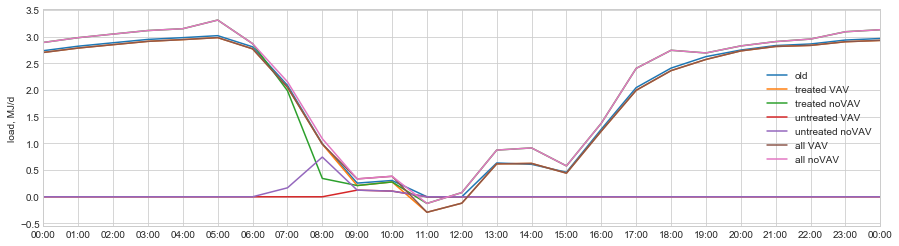

In [6]:
ac.draw_graph('load, MJ/d', get_data(1), op='raw', display_date=hday)

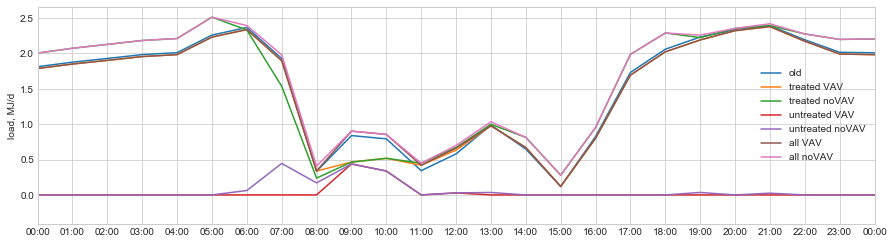

In [7]:
ac.draw_graph('load, MJ/d', get_data(2), op='raw', display_date=hday)

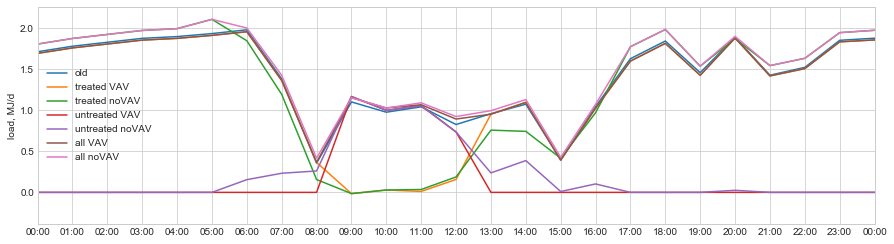

In [8]:
ac.draw_graph('load, MJ/d', get_data(3), op='raw', display_date=hday)

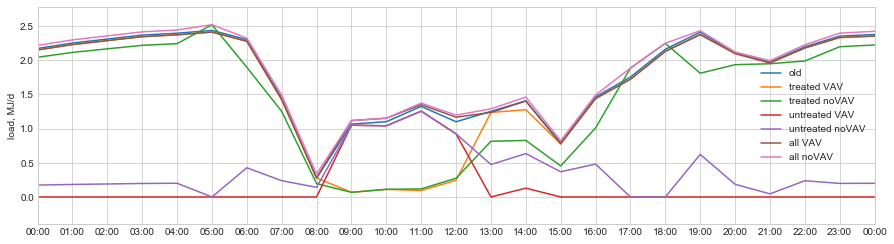

In [9]:
ac.draw_graph('load, MJ/d', get_data(4), op='raw', display_date=hday)

### 暖房（合計）

In [10]:
d = [
    (np.sum(ins_vav.l_h[0:5], axis=0), 'old'),
    (np.sum(ins_vav.l_d_act_h - ins_vav.q_trs_prt_h, axis=0), 'treated VAV'),
    (np.sum(ins_non.l_d_act_h - ins_non.q_trs_prt_h, axis=0), 'treated noVAV'),
    (np.sum(ins_vav.q_ut_h, axis=0), 'untreated VAV'),
    (np.sum(ins_non.q_ut_h, axis=0), 'untreated noVAV'),
    (np.sum(ins_vav.l_d_act_h - ins_vav.q_trs_prt_h + ins_vav.q_ut_h, axis=0), 'all VAV'),
    (np.sum(ins_non.l_d_act_h - ins_non.q_trs_prt_h + ins_non.q_ut_h, axis=0), 'all noVAV'),
]

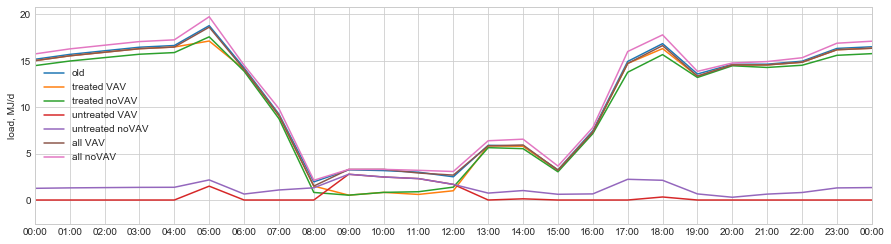

In [11]:
ac.draw_graph('load, MJ/d', d, op='raw', display_date=hday)

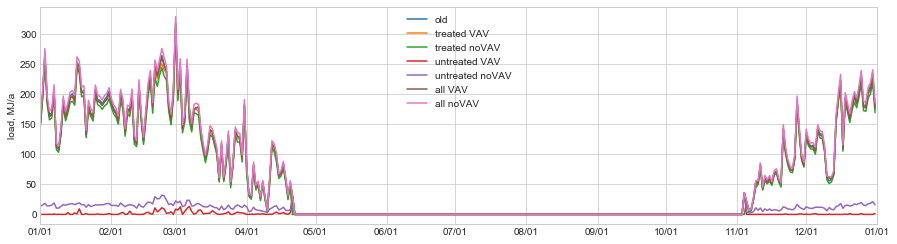

In [12]:
ac.draw_graph('load, MJ/a', d, op='itg')

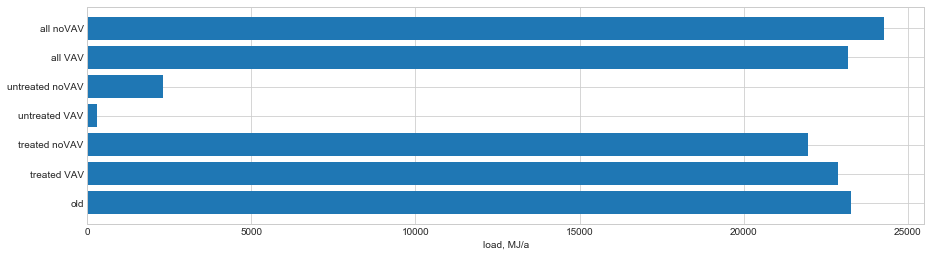

In [13]:
ac.draw_sum_bar_graph('load, MJ/a', d)

### 顕熱冷房（各室）

In [14]:
def get_data(rm):
    return [
        (ins_vav.l_cs[rm], 'old'),
        (ins_vav.l_d_act_cs[rm] - ins_vav.q_trs_prt_c[rm], 'treated VAV'),
        (ins_non.l_d_act_cs[rm] - ins_non.q_trs_prt_c[rm], 'treated noVAV'),
        (ins_vav.q_ut_cs[rm], 'untreated VAV'),
        (ins_non.q_ut_cs[rm], 'untreated noVAV'),
        (ins_vav.l_d_act_cs[rm] - ins_vav.q_trs_prt_c[rm] + ins_vav.q_ut_cs[rm], 'all VAV'),
        (ins_non.l_d_act_cs[rm] - ins_non.q_trs_prt_c[rm] + ins_non.q_ut_cs[rm], 'all noVAV'),
]

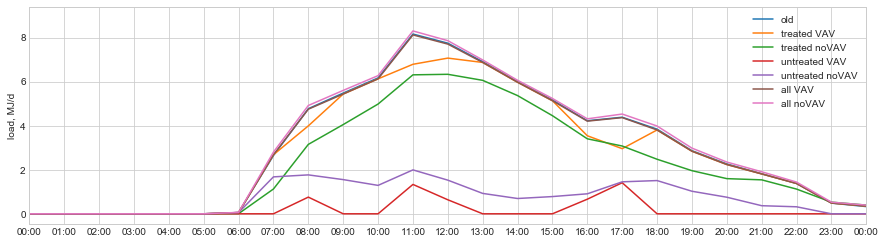

In [15]:
ac.draw_graph('load, MJ/d', get_data(0), op='raw', display_date=cday)

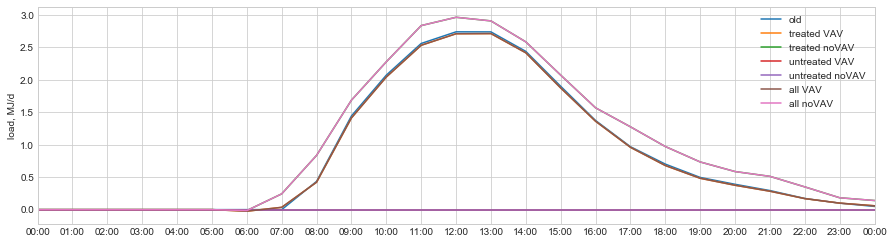

In [16]:
ac.draw_graph('load, MJ/d', get_data(1), op='raw', display_date=cday)

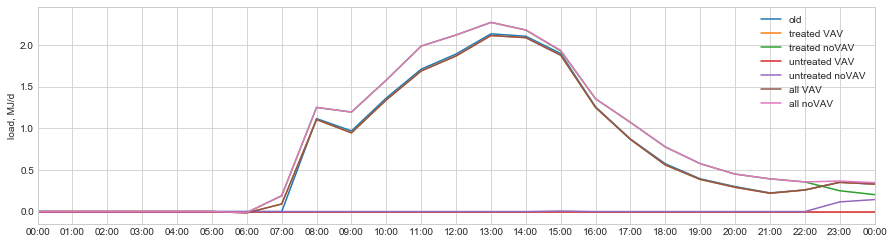

In [17]:
ac.draw_graph('load, MJ/d', get_data(2), op='raw', display_date=cday)

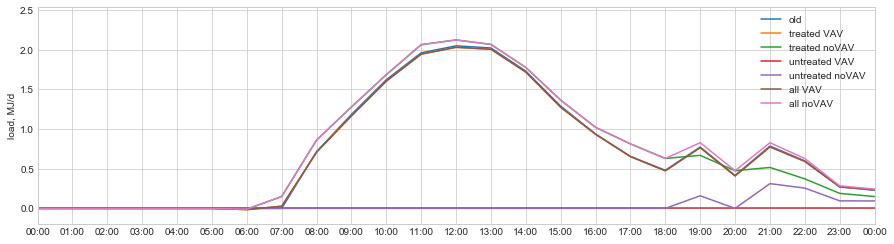

In [18]:
ac.draw_graph('load, MJ/d', get_data(3), op='raw', display_date=cday)

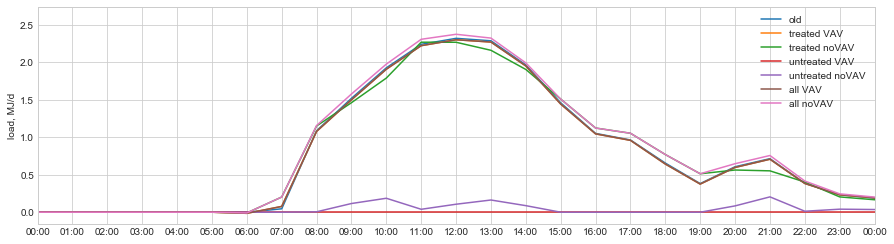

In [19]:
ac.draw_graph('load, MJ/d', get_data(4), op='raw', display_date=cday)

### 顕熱冷房（合計）

In [20]:
d = [
    (np.sum(ins_vav.l_cs[0:5], axis=0), 'old'),
    (np.sum(ins_vav.l_d_act_cs - ins_vav.q_trs_prt_c, axis=0), 'treated VAV'),
    (np.sum(ins_non.l_d_act_cs - ins_non.q_trs_prt_c, axis=0), 'treated noVAV'),
    (np.sum(ins_vav.q_ut_cs, axis=0), 'untreated VAV'),
    (np.sum(ins_non.q_ut_cs, axis=0), 'untreated noVAV'),
    (np.sum(ins_vav.l_d_act_cs - ins_vav.q_trs_prt_c + ins_vav.q_ut_cs, axis=0), 'all VAV'),
    (np.sum(ins_non.l_d_act_cs - ins_non.q_trs_prt_c + ins_non.q_ut_cs, axis=0), 'all noVAV'),
]

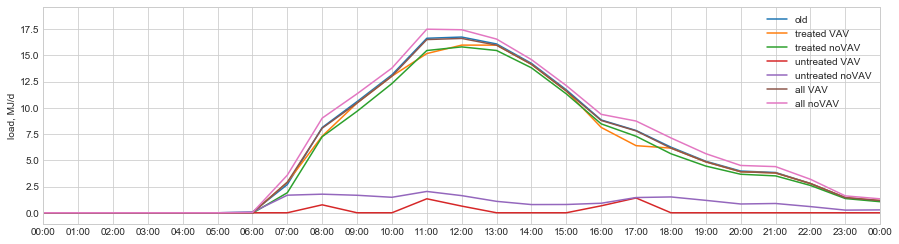

In [21]:
ac.draw_graph('load, MJ/d', d, op='raw', display_date=cday)

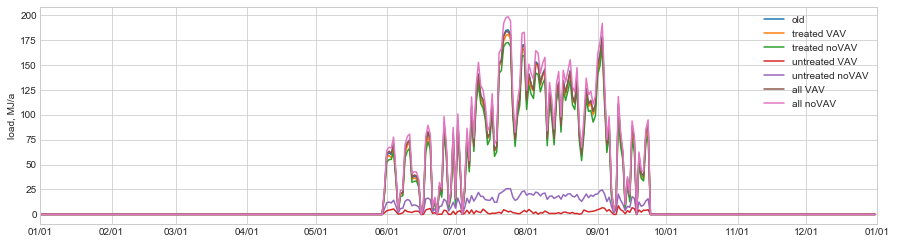

In [22]:
ac.draw_graph('load, MJ/a', d, op='itg')

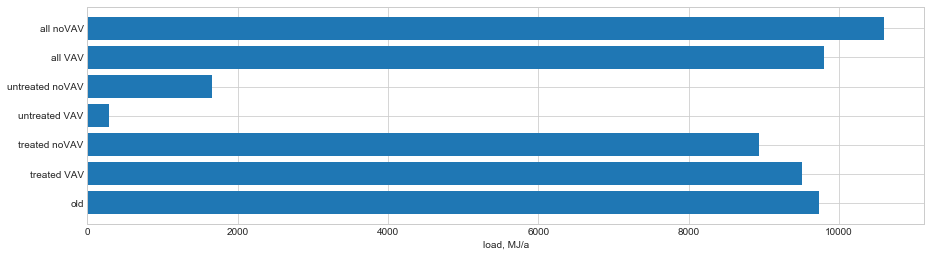

In [23]:
ac.draw_sum_bar_graph('load, MJ/a', d)

### 潜熱冷房（各室）

In [24]:
def get_data(rm):
    return [
        (ins_vav.l_cl[rm], 'old'),
        (ins_vav.l_d_act_cl[rm], 'treated VAV'),
        (ins_non.l_d_act_cl[rm], 'treated noVAV'),
        (ins_vav.q_ut_cl[rm], 'untreated VAV'),
        (ins_non.q_ut_cl[rm], 'untreated noVAV'),
        (ins_vav.l_d_act_cl[rm] + ins_vav.q_ut_cl[rm], 'all VAV'),
        (ins_non.l_d_act_cl[rm] + ins_non.q_ut_cl[rm], 'all noVAV'),
]

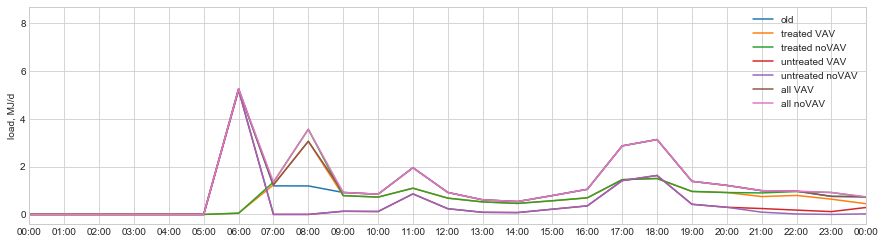

In [25]:
ac.draw_graph('load, MJ/d', get_data(0), op='raw', display_date=cday)

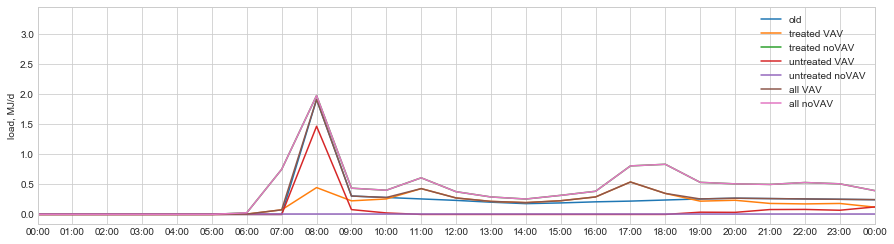

In [26]:
ac.draw_graph('load, MJ/d', get_data(1), op='raw', display_date=cday)

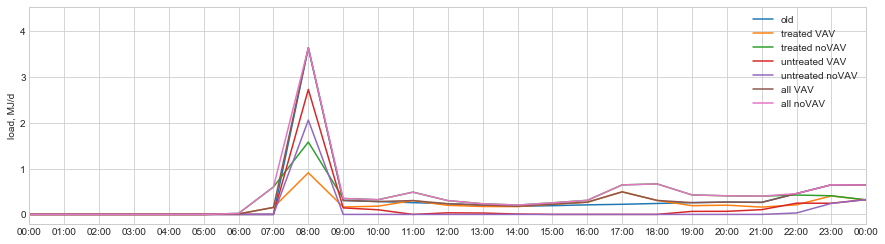

In [27]:
ac.draw_graph('load, MJ/d', get_data(2), op='raw', display_date=cday)

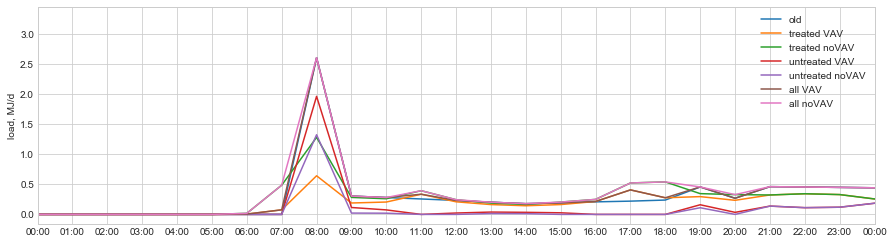

In [28]:
ac.draw_graph('load, MJ/d', get_data(3), op='raw', display_date=cday)

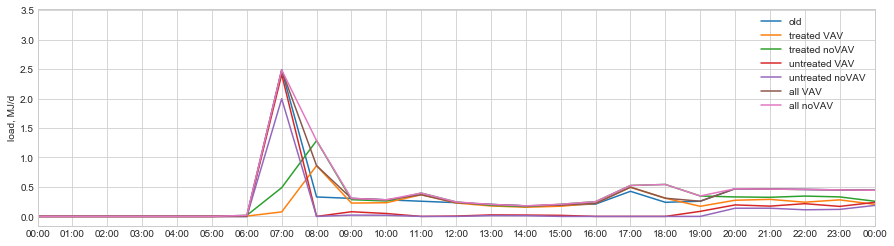

In [29]:
ac.draw_graph('load, MJ/d', get_data(4), op='raw', display_date=cday)

### 潜熱冷房（合計）

In [30]:
d = [
    (np.sum(ins_vav.l_cl[0:5], axis=0), 'old'),
    (np.sum(ins_vav.l_d_act_cl, axis=0), 'treated VAV'),
    (np.sum(ins_non.l_d_act_cl, axis=0), 'treated noVAV'),
    (np.sum(ins_vav.q_ut_cl, axis=0), 'untreated VAV'),
    (np.sum(ins_non.q_ut_cl, axis=0), 'untreated noVAV'),
    (np.sum(ins_vav.l_d_act_cl + ins_vav.q_ut_cl, axis=0), 'all VAV'),
    (np.sum(ins_non.l_d_act_cl + ins_non.q_ut_cl, axis=0), 'all noVAV'),
]

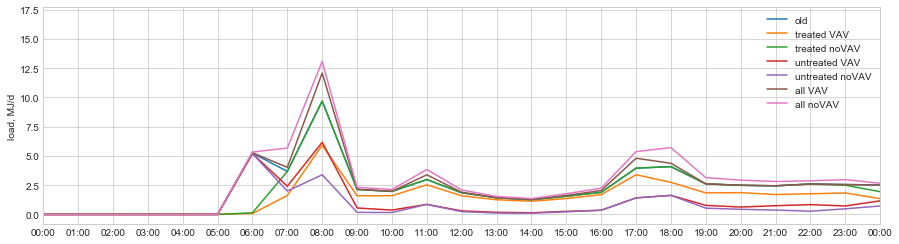

In [31]:
ac.draw_graph('load, MJ/d', d, op='raw', display_date=cday)

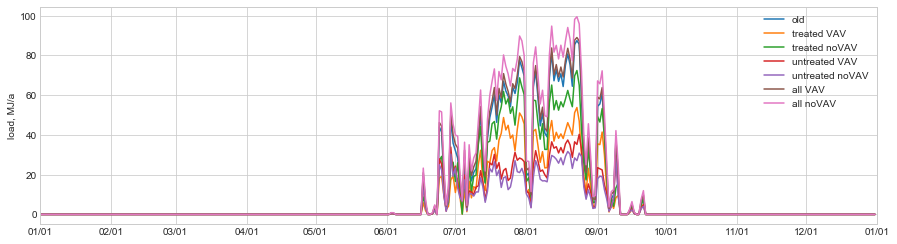

In [32]:
ac.draw_graph('load, MJ/a', d, op='itg')

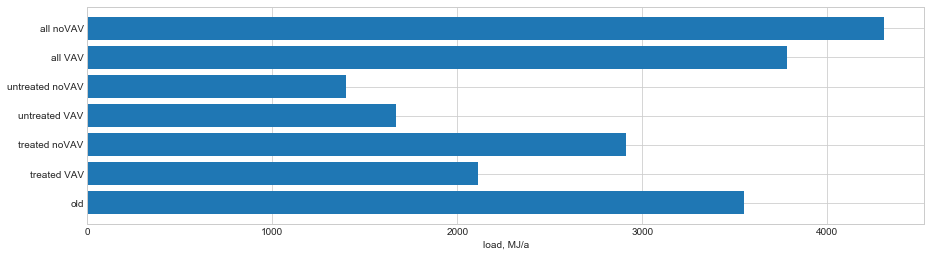

In [33]:
ac.draw_sum_bar_graph('load, MJ/a', d)

## 非居室の負荷

VAV有りとVAV無しにおいて、居室の負荷と未処理負荷、もともとの負荷を比較する。比較の際に、間仕切りの熱移動を含まない。

### 暖房

In [34]:
d = [
    (np.sum(ins_vav.l_h[5:12], axis=0), 'old'),
    (ins_vav.l_d_act_nac_h + np.sum(ins_vav.q_trs_prt_h, axis=0), 'treated VAV'),
    (ins_non.l_d_act_nac_h + np.sum(ins_non.q_trs_prt_h, axis=0), 'treated noVAV'),
]

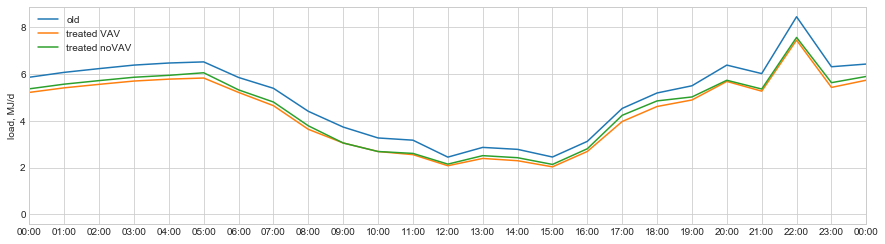

In [35]:
ac.draw_graph('load, MJ/d', d, op='raw', display_date=hday)

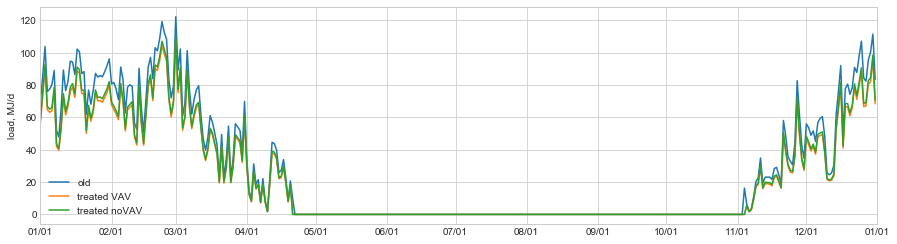

In [36]:
ac.draw_graph('load, MJ/d', d, op='itg')

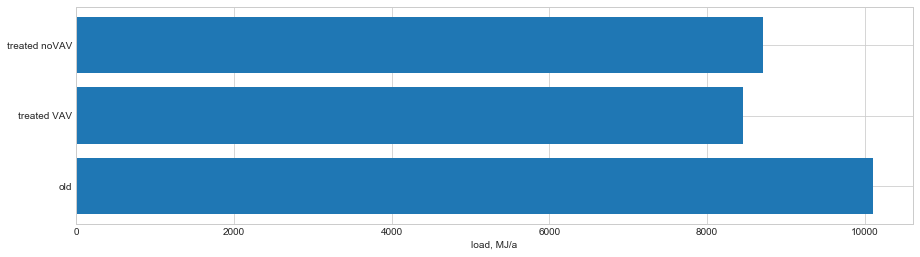

In [37]:
ac.draw_sum_bar_graph('load, MJ/a', d)

### 顕熱冷房

In [38]:
d = [
    (np.sum(ins_vav.l_cs[5:12], axis=0), 'old'),
    (ins_vav.l_d_act_nac_cs + np.sum(ins_vav.q_trs_prt_c, axis=0), 'treated VAV'),
    (ins_non.l_d_act_nac_cs + np.sum(ins_non.q_trs_prt_c, axis=0), 'treated noVAV'),
]

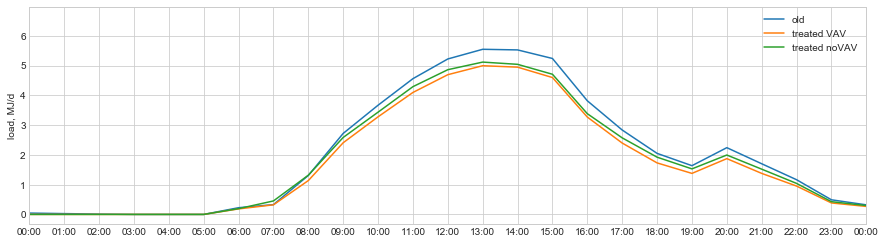

In [39]:
ac.draw_graph('load, MJ/d', d, op='raw', display_date=cday)

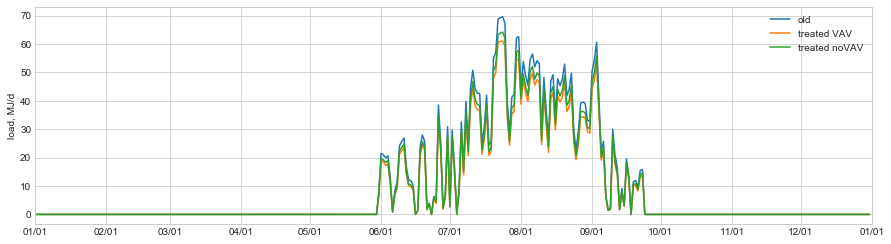

In [40]:
ac.draw_graph('load, MJ/d', d, op='itg')

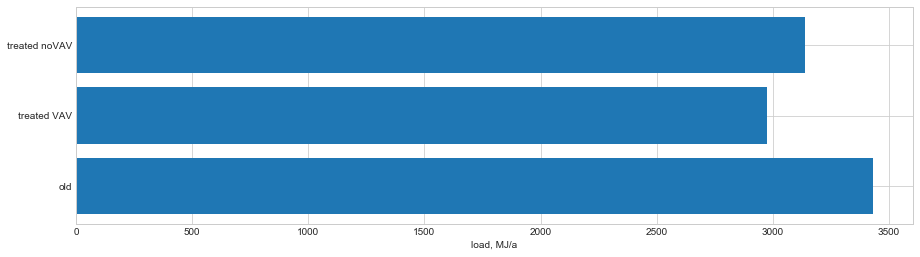

In [41]:
ac.draw_sum_bar_graph('load, MJ/a', d)

## 配管熱損失

### 暖房

In [42]:
d = [
    (np.sum(non_non.q_loss_duct_h, axis=0), 'noninsulated no-VAV'),
    (np.sum(ins_non.q_loss_duct_h, axis=0), 'insulated no-VAV'),
    (np.sum(ins_vav.q_loss_duct_h, axis=0), 'insulated VAV'),
]

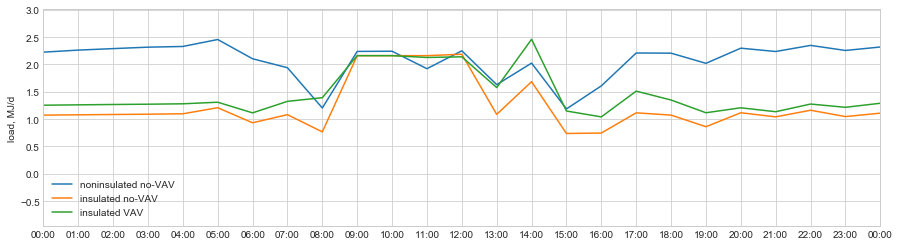

In [43]:
ac.draw_graph('load, MJ/d', d, op='raw', display_date=hday)

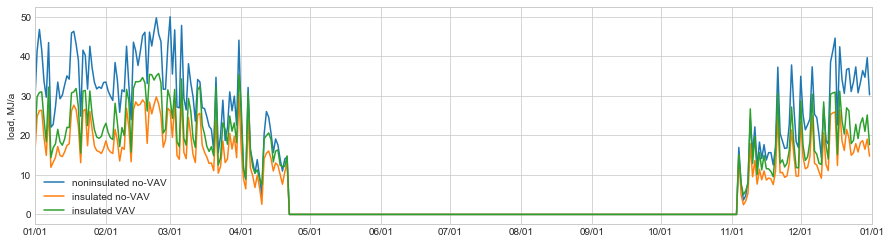

In [44]:
ac.draw_graph('load, MJ/a', d, op='itg')

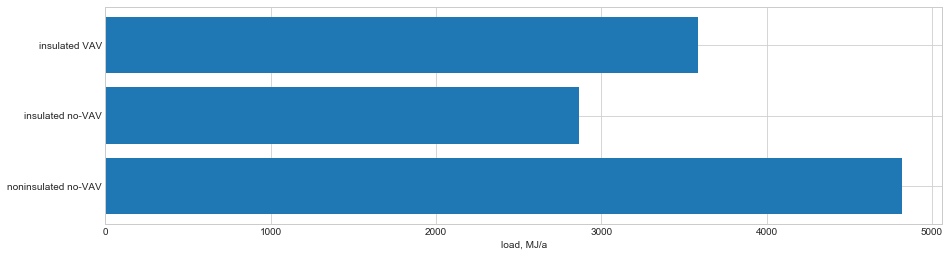

In [45]:
ac.draw_sum_bar_graph('load, MJ/a', d)

### 冷房

In [46]:
d = [
    (np.sum(non_non.q_gain_duct_c, axis=0), 'noninsulated no-VAV'),
    (np.sum(ins_non.q_gain_duct_c, axis=0), 'insulated no-VAV'),
    (np.sum(ins_vav.q_gain_duct_c, axis=0), 'insulated VAV'),
]

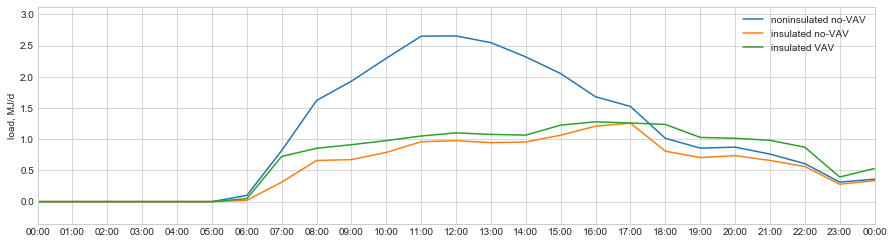

In [47]:
ac.draw_graph('load, MJ/d', d, op='raw', display_date=cday)

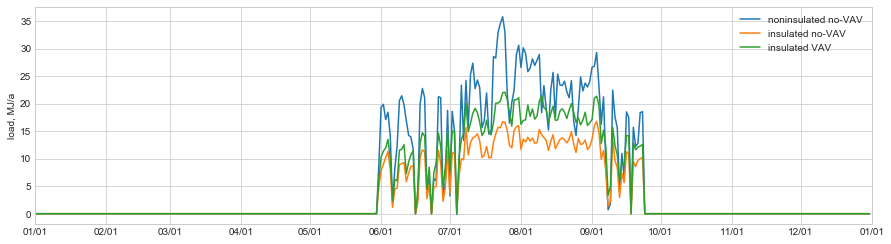

In [48]:
ac.draw_graph('load, MJ/a', d, op='itg')

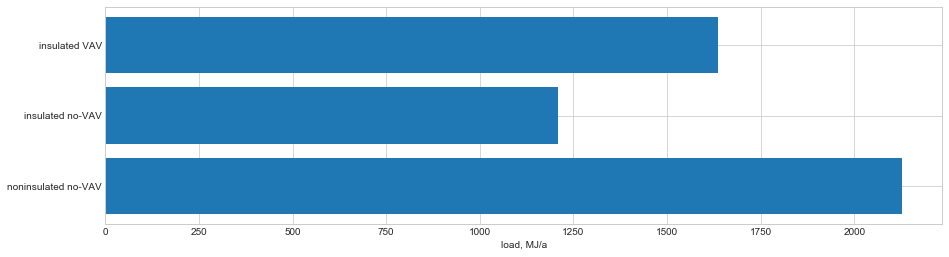

In [49]:
ac.draw_sum_bar_graph('load, MJ/a', d)

## 処理熱量の計算の確認

### 暖房

In [50]:
v1 = sum(ins_non.q_hs_h)
v2 = sum(np.sum(ins_non.l_d_act_h, axis=0) + ins_non.l_d_act_nac_h + np.sum(ins_non.q_loss_duct_h, axis=0))
(v1, v2, v1-v2)

(33577.240672151354, 33541.55695655794, 35.68371559341176)

In [51]:
v1 = sum(non_non.q_hs_h)
v2 = sum(np.sum(non_non.l_d_act_h, axis=0) + non_non.l_d_act_nac_h + np.sum(non_non.q_loss_duct_h, axis=0))
(v1, v2, v1-v2)

(35546.03157527892, 35513.925071983576, 32.1065032953411)

In [52]:
v1 = sum(ins_vav.q_hs_h)
v2 = sum(np.sum(ins_vav.l_d_act_h, axis=0) + ins_vav.l_d_act_nac_h + np.sum(ins_vav.q_loss_duct_h, axis=0))
(v1, v2, v1-v2)

(34954.370708808325, 34915.97384569685, 38.396863111476705)

### 顕熱冷房

In [53]:
v1 = sum(ins_non.q_hs_cs)
v2 = sum(np.sum(ins_non.l_d_act_cs, axis=0) + ins_non.l_d_act_nac_cs + np.sum(ins_non.q_gain_duct_c, axis=0))
(v1, v2, v1-v2)

(13284.83639443626, 13284.83639443626, 0.0)

In [54]:
v1 = sum(non_non.q_hs_cs)
v2 = sum(np.sum(non_non.l_d_act_cs, axis=0) + non_non.l_d_act_nac_cs + np.sum(non_non.q_gain_duct_c, axis=0))
(v1, v2, v1-v2)

(14220.135848785243, 14220.099245142628, 0.03660364261486393)

In [55]:
v1 = sum(ins_vav.q_hs_cs)
v2 = sum(np.sum(ins_vav.l_d_act_cs, axis=0) + ins_vav.l_d_act_nac_cs + np.sum(ins_vav.q_gain_duct_c, axis=0))
(v1, v2, v1-v2)

(14118.061470839877, 14118.061470839877, 0.0)

### 潜熱冷房

In [56]:
v1 = sum(ins_non.q_hs_cl)
v2 = sum(np.sum(ins_non.l_d_act_cl, axis=0) + ins_non.l_d_act_nac_cl)
(v1, v2, v1-v2)

(2909.4485816351043, 2909.4485816351043, 0.0)

In [57]:
v1 = sum(non_non.q_hs_cl)
v2 = sum(np.sum(non_non.l_d_act_cl, axis=0) + non_non.l_d_act_nac_cl)
(v1, v2, v1-v2)

(2909.4485816351043, 2909.4485816351043, 0.0)

In [58]:
v1 = sum(ins_vav.q_hs_cl)
v2 = sum(np.sum(ins_vav.l_d_act_cl, axis=0) + ins_vav.l_d_act_nac_cl)
(v1, v2, v1-v2)

(2110.0941109962505, 2110.0941109962505, 0.0)

## 処理熱量

### 暖房

In [59]:
d = [
    (np.sum(ins_vav.l_h, axis=0), 'old'),
    (ins_non.q_hs_h, 'output (insulated no-vav)'),
    (ins_non.q_hs_h + np.sum(ins_non.q_ut_h, axis=0), 'output + untreated (insulated no-vav)'),
    (non_non.q_hs_h, 'output (noninsulated no-vav)'),
    (non_non.q_hs_h + np.sum(non_non.q_ut_h, axis=0), 'output + untreated (noninsulated no-vav)'),
    (ins_vav.q_hs_h, 'output (insulated vav)'),
    (ins_vav.q_hs_h + np.sum(ins_vav.q_ut_h, axis=0), 'output + untreated (insulated vav)'),
]

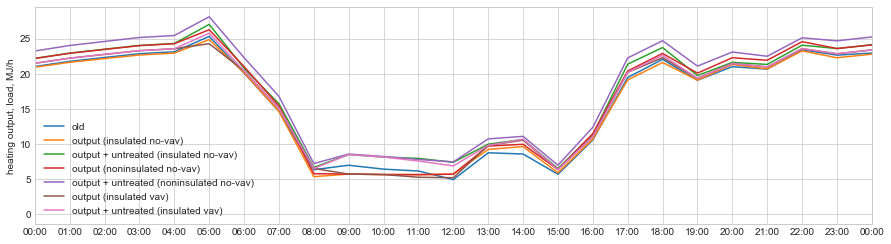

In [60]:
ac.draw_graph('heating output, load, MJ/h', d, op='raw', display_date=hday)

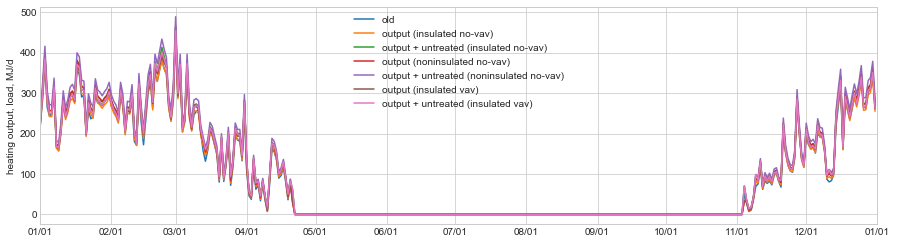

In [61]:
ac.draw_graph('heating output, load, MJ/d', d, op='itg')

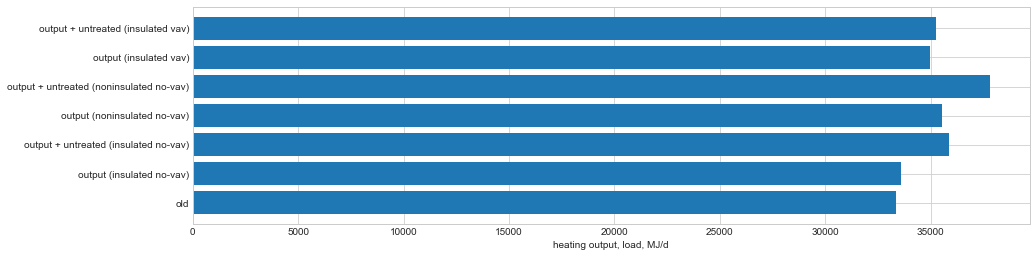

In [62]:
ac.draw_sum_bar_graph('heating output, load, MJ/d', d)

### 顕熱冷房

In [63]:
d = [
    (np.sum(ins_vav.l_cs, axis=0), 'old'),
    (ins_non.q_hs_cs, 'output (insulated no-vav)'),
    (ins_non.q_hs_cs + np.sum(ins_non.q_ut_cs, axis=0), 'output + untreated (insulated no-vav)'),
    (non_non.q_hs_cs, 'output (noninsulated no-vav)'),
    (non_non.q_hs_cs + np.sum(non_non.q_ut_cs, axis=0), 'output + untreated (noninsulated no-vav)'),
    (ins_vav.q_hs_cs, 'output (insulated vav)'),
    (ins_vav.q_hs_cs + np.sum(ins_vav.q_ut_cs, axis=0), 'output + untreated (insulated vav)'),
]

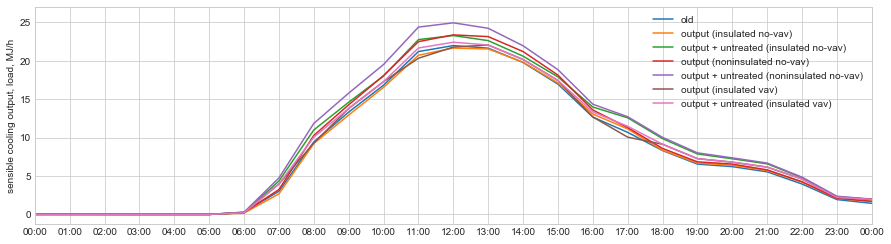

In [64]:
ac.draw_graph('sensible cooling output, load, MJ/h', d, op='raw', display_date=cday)

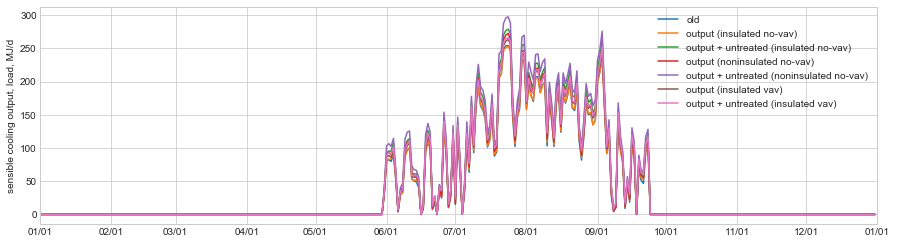

In [65]:
ac.draw_graph('sensible cooling output, load, MJ/d', d, op='itg')

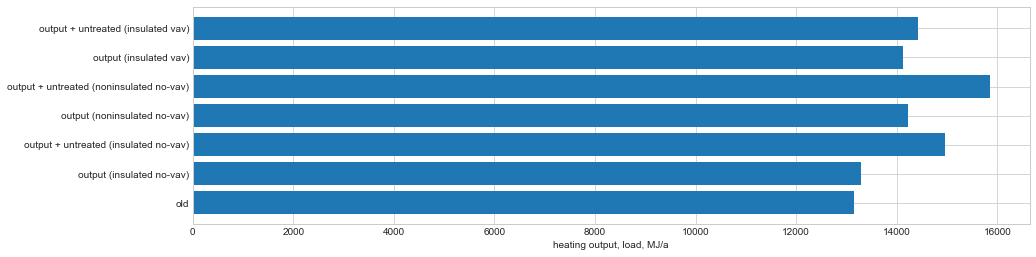

In [66]:
ac.draw_sum_bar_graph('heating output, load, MJ/a', d)

### 潜熱冷房

In [67]:
d = [
    (np.sum(ins_vav.l_cl, axis=0), 'old'),
    (ins_non.q_hs_cl, 'output (insulated no-vav)'),
    (ins_non.q_hs_cl + np.sum(ins_non.q_ut_cl, axis=0), 'output + untreated (insulated no-vav)'),
    (non_non.q_hs_cl, 'output (noninsulated no-vav)'),
    (non_non.q_hs_cl + np.sum(non_non.q_ut_cl, axis=0), 'output + untreated (noninsulated no-vav)'),
    (ins_vav.q_hs_cl, 'output (insulated vav)'),
    (ins_vav.q_hs_cl + np.sum(ins_vav.q_ut_cl, axis=0), 'output + untreated (insulated vav)'),
]

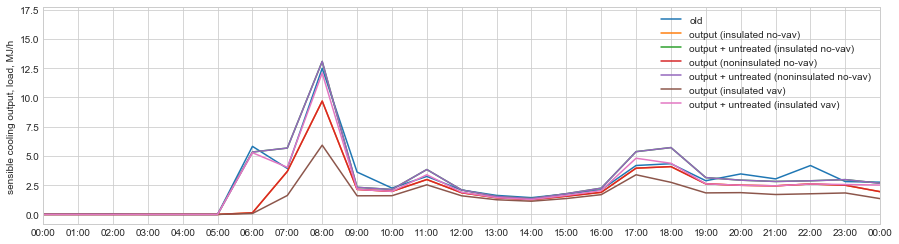

In [68]:
ac.draw_graph('sensible cooling output, load, MJ/h', d, op='raw', display_date=cday)

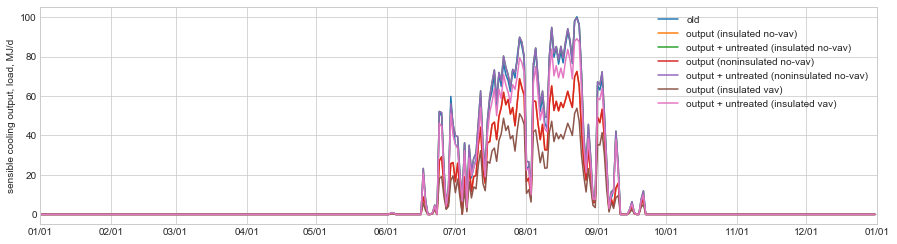

In [69]:
ac.draw_graph('sensible cooling output, load, MJ/d', d, op='itg')

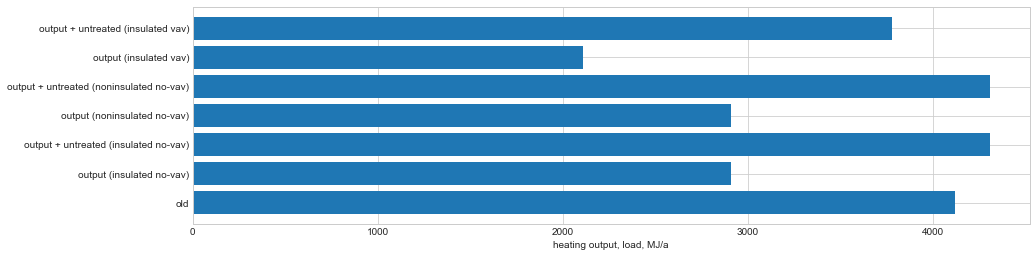

In [70]:
ac.draw_sum_bar_graph('heating output, load, MJ/a', d)